<a href="https://colab.research.google.com/github/jevabrir/ProyFin_Estad-stica/blob/main/Equipo_11_ProyEstad%C3%ADstica_UVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

##**Equipo 11:**


Predecir: Sales
TV	Radio	Social Media	Influencer
https://www.kaggle.com/code/abdelrahman21elrayes/marketing-sales-linear-regression


Variables en el modelo:
Dependiente :
*  Y= precio auto

Independientes x1, x2, x3:
Seleccionen Tres variables del dataset que tengan una correlación alta

*  X1= TV
*  X2= Radio
*  X3= Social Media

In [2]:
# Leer el archivo Excel
df = pd.read_csv('CarPrice_Assignment.csv')

# Indica el tamaño del df (renglones, columnas)
print('El data set contiene',df.shape[0],'filas y',df.shape[1],'columnas\n')

# Ver las primeras 5 líneas del df
df.head(5)

El data set contiene 205 filas y 26 columnas



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df = df.dropna()

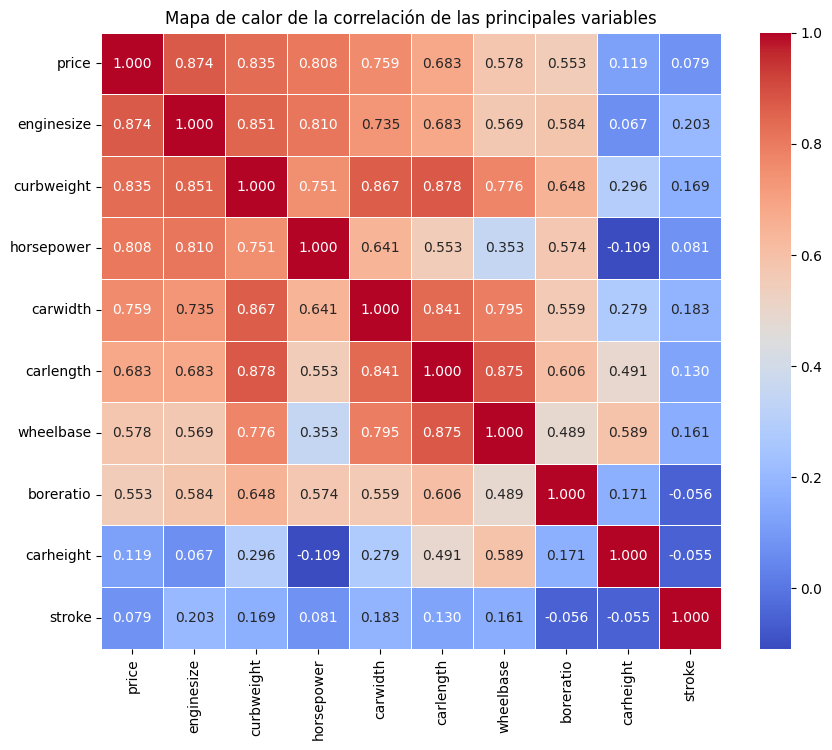

In [7]:
# Convertir todas las columnas a valores numéricos (forzando errores a NaN si no se puede convertir)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Imputar valores faltantes con la media de cada columna
df_imputado = df_numeric.fillna(df_numeric.mean())

# Calcular la matriz de correlación
corr_matrix = df_imputado.corr()

# Ordenar la matriz de correlación por la correlación absoluta con la variable objetivo (Density of Base Fluid (ρbf))
corr_sorted = corr_matrix['price'].sort_values(ascending=False)

# Seleccionar las variables más correlacionadas (puedes ajustar el número de variables que deseas ver)
top_corr = corr_sorted.head(10)  # Top 10 variables correlacionadas

# Crear la gráfica de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputado[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Mapa de calor de la correlación de las principales variables')
plt.show()

In [8]:
corr_sorted

,price
price,1.0000
enginesize,0.8741
curbweight,0.8353
horsepower,0.8081
carwidth,0.7593
carlength,0.6829
wheelbase,0.5778
boreratio,0.5532
carheight,0.1193
stroke,0.0794


In [9]:
# Colocar las variabes de estudio comenzando por la variable a predecir

VariablesEstudio = ['price','enginesize','curbweight','horsepower']
df_estudio = df_imputado[VariablesEstudio]
df_estudio.head(5)

,price,enginesize,curbweight,horsepower
0,13495.0000,130,2548,111
1,16500.0000,130,2548,111
2,16500.0000,152,2823,154
3,13950.0000,109,2337,102
4,17450.0000,136,2824,115


In [10]:
# Calcular estadísticos
df_estudio.describe().T

,count,mean,std,min,25%,50%,75%,max
price,205.0000,13276.7106,7988.8523,5118.0000,7788.0000,10295.0000,16503.0000,45400.0000
enginesize,205.0000,126.9073,41.6427,61.0000,97.0000,120.0000,141.0000,326.0000
curbweight,205.0000,2555.5659,520.6802,1488.0000,2145.0000,2414.0000,2935.0000,4066.0000
horsepower,205.0000,104.1171,39.5442,48.0000,70.0000,95.0000,116.0000,288.0000


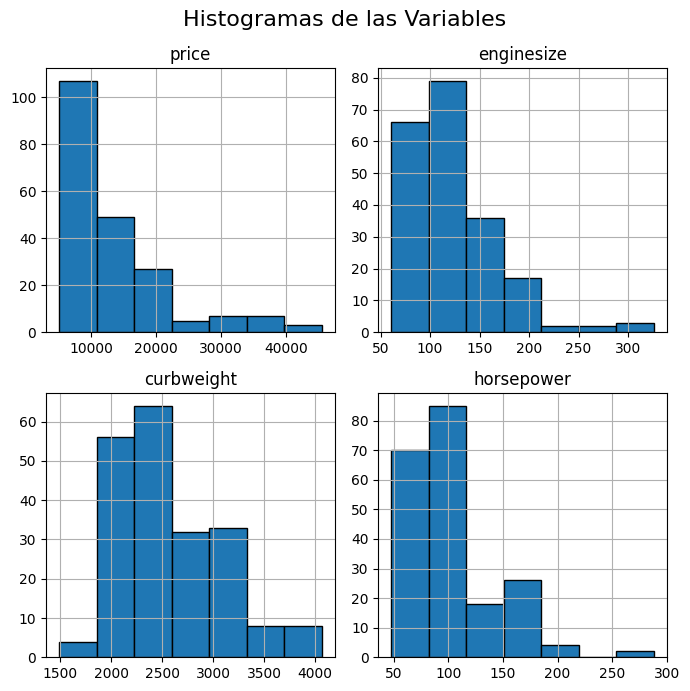

In [11]:
# Genera Histográmas
df_estudio.hist(bins=7, figsize=(7, 7), grid=True, edgecolor='black')
plt.suptitle('Histogramas de las Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# Código Modelo Regresión Lineal
# Datos de entrada
X1 = df_estudio.iloc[:, 1]
X2 = df_estudio.iloc[:, 2]
X3 = df_estudio.iloc[:, 3]
Y  = df_estudio.iloc[:, 0]

# Construcción de la matriz X con una columna de unos para la intersección
X_matrix = np.column_stack((np.ones(len(X1)), X1, X2, X3))

# Cálculo de los coeficientes usando la pseudoinversa
beta = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

# Separación de coeficientes
b, a1, a2, a3 = beta

# Calcular valores predichos
Y_pred = X_matrix @ beta

# Calcular R^2
SS_res = np.sum((Y - Y_pred) ** 2)       # Suma de residuos al cuadrado
SS_tot = np.sum((Y - np.mean(Y)) ** 2)   # Suma total de cuadrados
R2 = 1 - (SS_res / SS_tot)

# Mostrar ecuación y R^2
print(f"Ecuación de regresión:\n")
print(f"Y = {a1:.3f} X1 + {a2:.3f} X2 + {a3:.3f} X3 + {b:.3f}\n")
print(f"Coeficiente de determinación (R²): {R2:.4f}")


Ecuación de regresión:

Y = 84.880 X1 + 4.263 X2 + 48.747 X3 + -13463.789

Coeficiente de determinación (R²): 0.8138


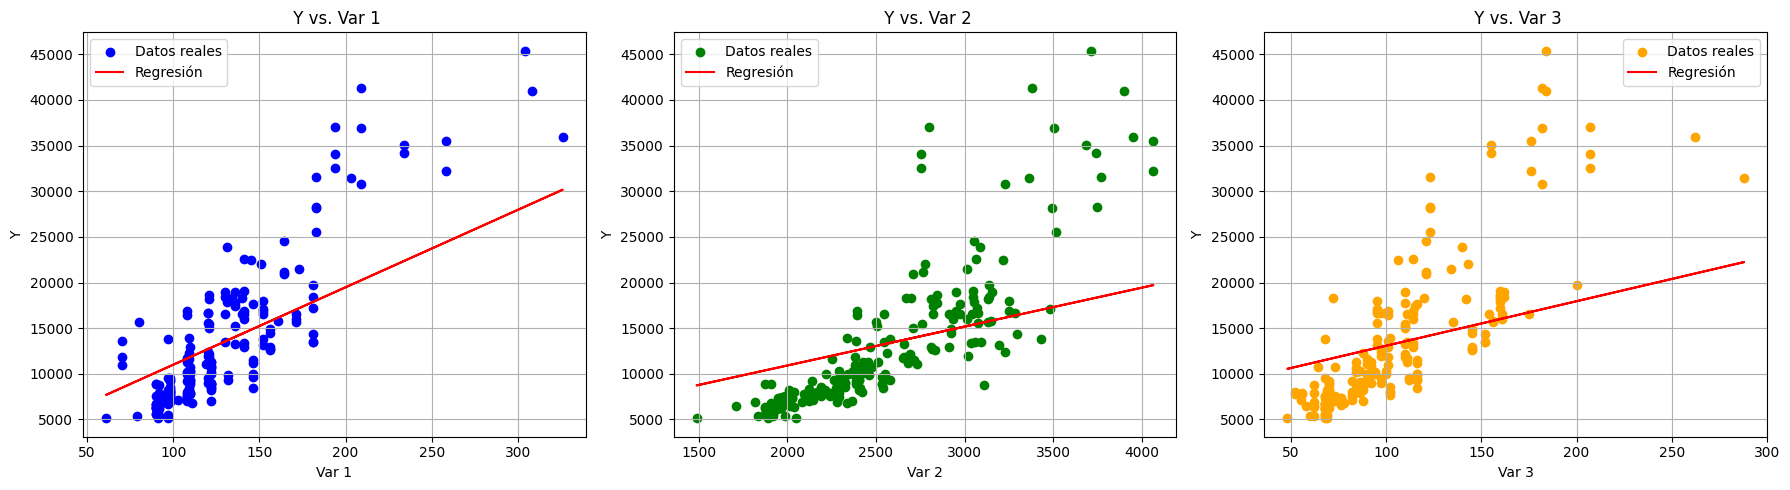

In [13]:
import matplotlib.pyplot as plt

# Crear figura con tamaño adecuado para 3 subgráficas
plt.figure(figsize=(18, 5))

# -------- Gráfica de Y vs X1 (Tamaño de la casa) --------
plt.subplot(1, 3, 1)
plt.scatter(X1, Y, color='blue', label='Datos reales')
plt.plot(X1, a1 * X1 + a2 * X2.mean() + a3 * X3.mean() + b, color='red', label='Regresión')
plt.xlabel("Var 1")
plt.ylabel("Y")
plt.title(" Y vs. Var 1")
plt.legend()
plt.grid(True)

# -------- Gráfica de Y vs X2 (Número de habitaciones) --------
plt.subplot(1, 3, 2)
plt.scatter(X2, Y, color='green', label='Datos reales')
plt.plot(X2, a1 * X1.mean() + a2 * X2 + a3 * X3.mean() + b, color='red', label='Regresión')
plt.xlabel("Var 2")
plt.ylabel("Y")
plt.title(" Y vs. Var 2")
plt.legend()
plt.grid(True)

# -------- Gráfica de Y vs X3 (Edad de la casa, por ejemplo) --------
plt.subplot(1, 3, 3)
plt.scatter(X3, Y, color='orange', label='Datos reales')
plt.plot(X3, a1 * X1.mean() + a2 * X2.mean() + a3 * X3 + b, color='red', label='Regresión')
plt.xlabel("Var 3")
plt.ylabel("Y")
plt.title(" Y vs. Var 3")
plt.legend()
plt.grid(True)

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

In [14]:
def predecir_y(beta, x1, x2, x3):
    """
    Predice el valor de Y dado un conjunto de variables independientes y los coeficientes del modelo.
    """
    b, a1, a2, a3 = beta
    y_estimada = a1 * x1 + a2 * x2 + a3 * x3 + b
    print(f"\nPara X1={x1}, X2={x2}, X3={x3} → Y estimado = {y_estimada:.3f}")
    return y_estimada

In [ ]:
y_est = predecir_y(beta, x1=40, x2=20, x3=6)